-----------------------------
## Context:
-----------------------------
In this case study, we will use the Education dataset which contains information on educational institutes in USA. The data has various attributes about number of applications received, enrollments, faculty education, financial aspects and graduation rate of each institute. 

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and extract insights. 

-----------------------------
## Dataset: 
-----------------------------

The Education dataset contains information on various colleges in USA. It contains the following information:

- Names: Names of various universities and colleges
- Apps: Number of applications received
- Accept: Number of applications accepted
- Enroll: Number of new students enrolled
- Top10perc: Percentage of new students from top 10% of Higher Secondary class
- Top25perc: Percentage of new students from top 25% of Higher Secondary class
- F_Undergrad: Number of full-time undergraduate students
- P_Undergrad: Number of part-time undergraduate students
- Outstate: Number of students for whom the particular college or university is out-of-state tuition
- Room_Board: Cost of room and board
- Books: Estimated book costs for a student
- Personal: Estimated personal spending for a student
- PhD: Percentage of faculties with a Ph.D.
- Terminal: Percentage of faculties with terminal degree
- S_F_Ratio: Student/faculty ratio
- perc_alumni: Percentage of alumni who donate
- Expend: The instructional expenditure per student
- Grad_Rate: Graduation rate

## Importing libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#Importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading data

In [2]:
data=pd.read_csv("Education.csv")

In [3]:
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### Check the info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

**Observations:**

- There are 777 observations and 18 columns in the dataset.
- All columns have 777 non-null values i.e. there are no missing values.
- All columns are numeric except the Names column which is of object data type.

## Data Preprocessing and Exploratory Data Analysis

#### Check if all the college names are unique

In [5]:
data.Names.nunique()

777

**Observations:**

- All college names are unique
- As all entries are unique, it would not add value to our analysis. We can drop the Names column. 

In [6]:
#Dropping Names column 
data.drop(columns="Names", inplace=True)

#### Summary Statistics

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


**Observations:**

- On an average, approx 3,000 applications are received in US universities, out of which around 2,000 applications are accepted by the universities and around 780 new students get enrolled.
- The standard deviation is very high for these variables - Apps, Accepted, Enroll which shows the variety of universities and colleges.
- The average cost for room and board, books, and personal expense is approx 4,357, 550, and 1,350 dollars respectively.
- The average number of full time undergrad students are around 3700 whereas the average number of part-time undergrad students stand low at around 850.
- PhD and Grad_Rate have a maximum value of greater than 100 which is not possible as these variables are in percentages. Let's see how many such observations are there in the data.

In [8]:
data[(data.PhD>100) | (data.Grad_Rate>100)]

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
582,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


**There is just one such observation for each variable. We can cap the values to 100%.**

In [9]:
data.loc[582,"PhD"]=100
data.loc[95,"Grad_Rate"]=100

#### Let's check the distribution and outliers for each column in the data

Apps
Skew : 3.72


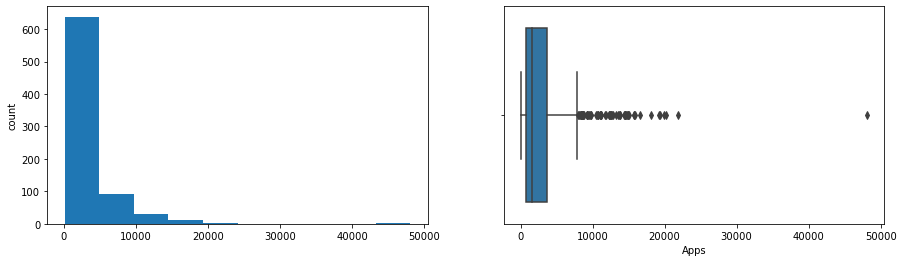

Accept
Skew : 3.42


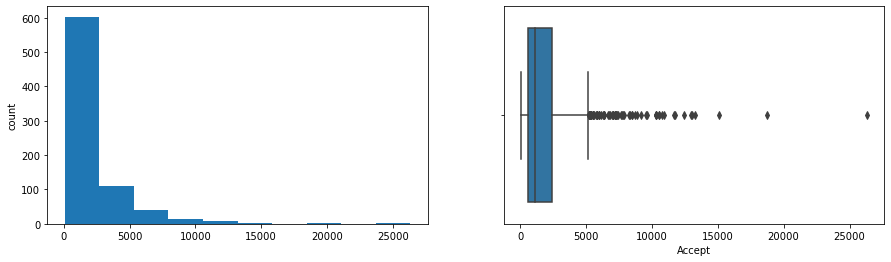

Enroll
Skew : 2.69


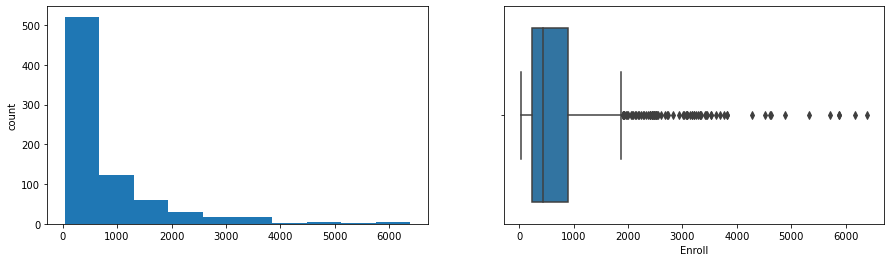

Top10perc
Skew : 1.41


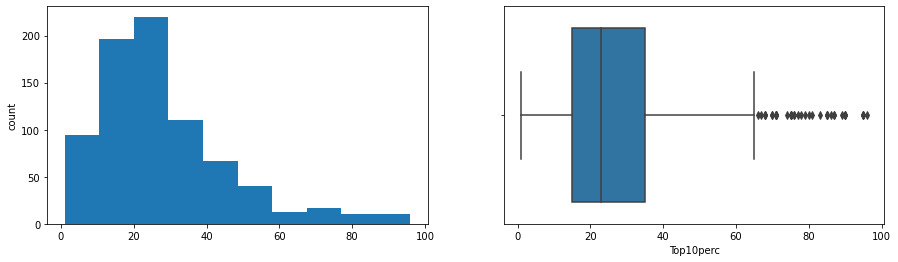

Top25perc
Skew : 0.26


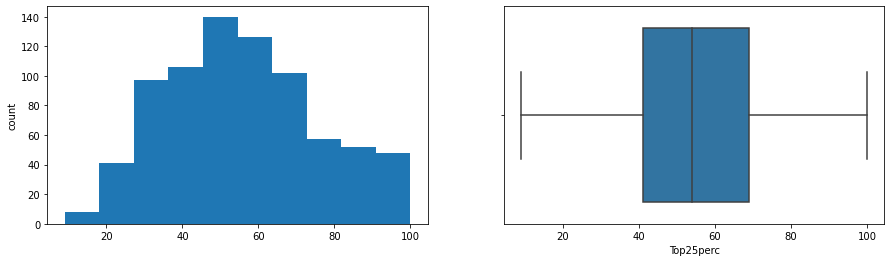

F_Undergrad
Skew : 2.61


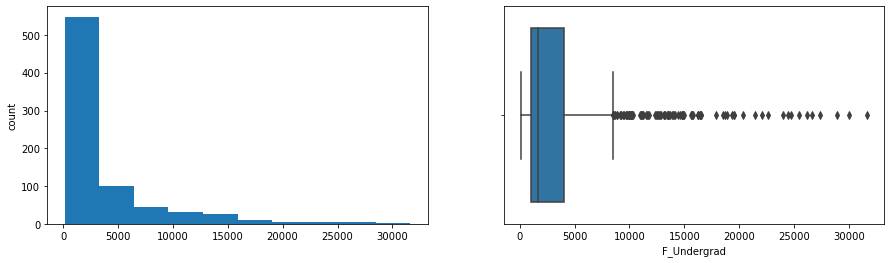

P_Undergrad
Skew : 5.69


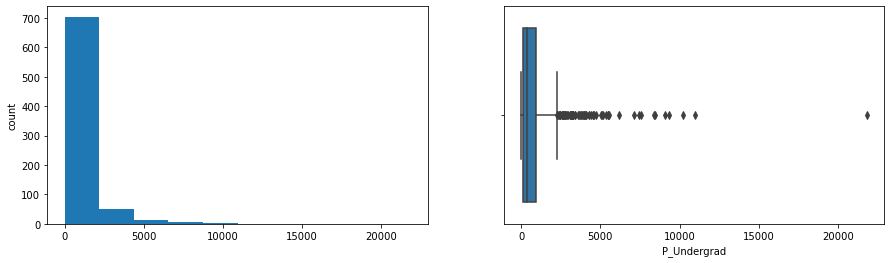

Outstate
Skew : 0.51


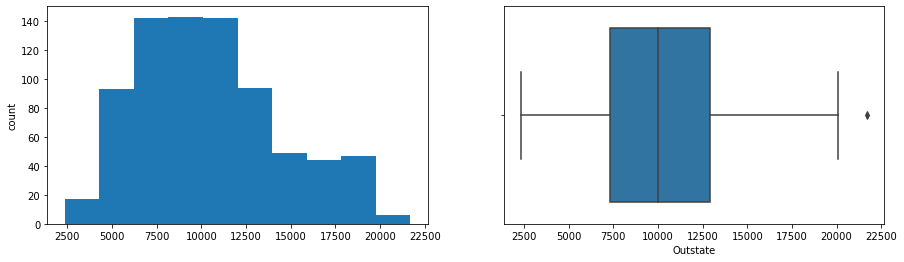

Room_Board
Skew : 0.48


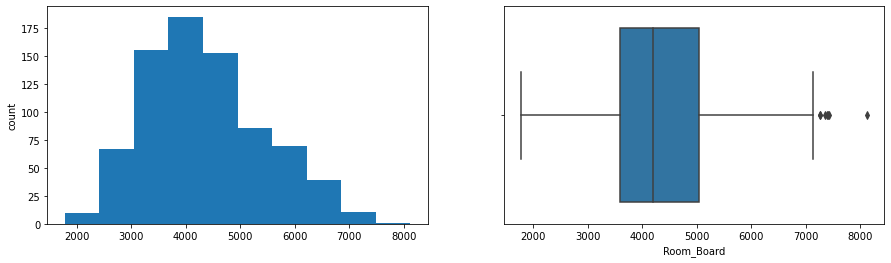

Books
Skew : 3.49


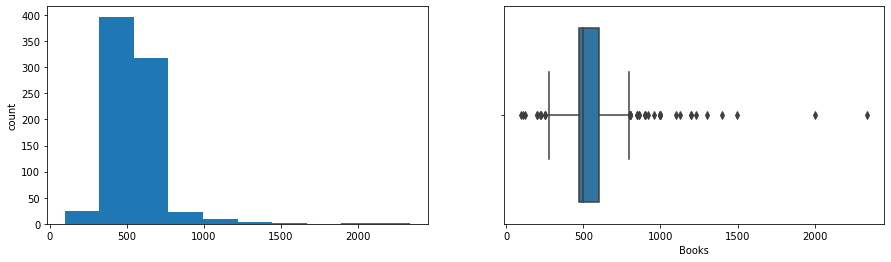

Personal
Skew : 1.74


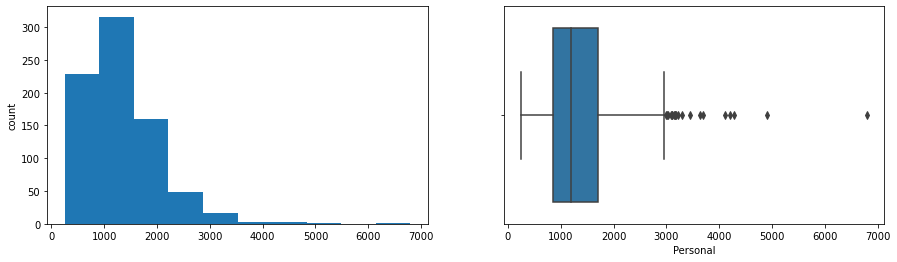

PhD
Skew : -0.77


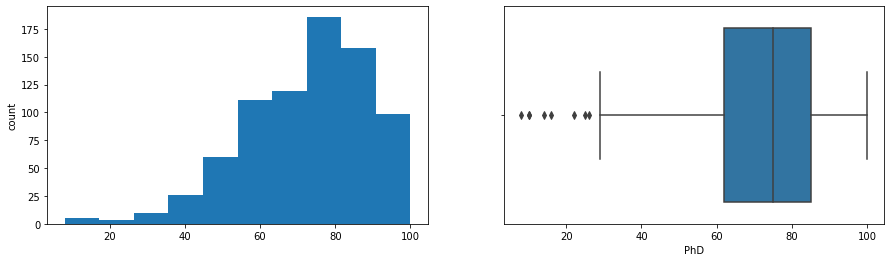

Terminal
Skew : -0.82


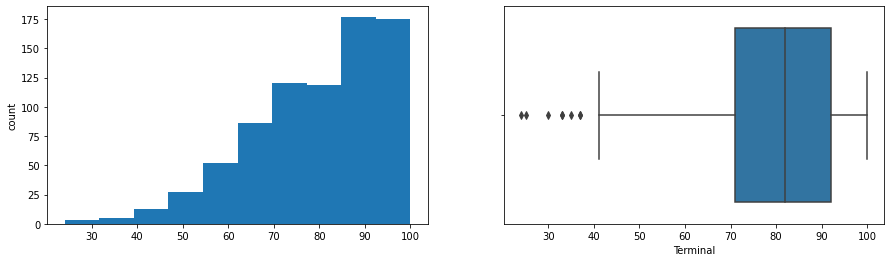

S_F_Ratio
Skew : 0.67


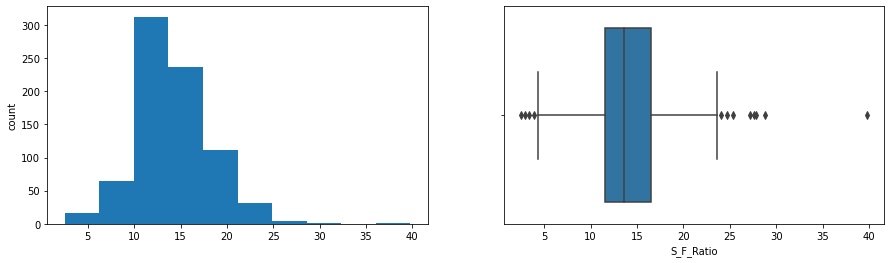

perc_alumni
Skew : 0.61


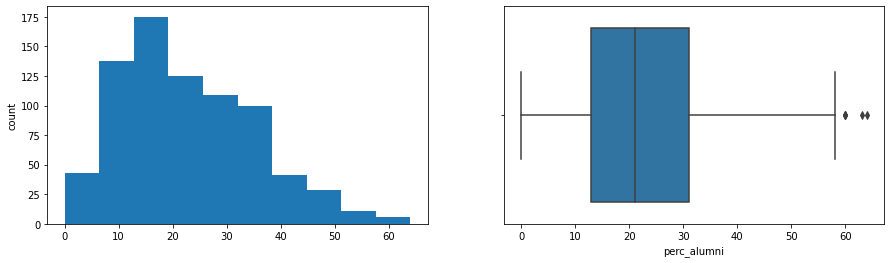

Expend
Skew : 3.46


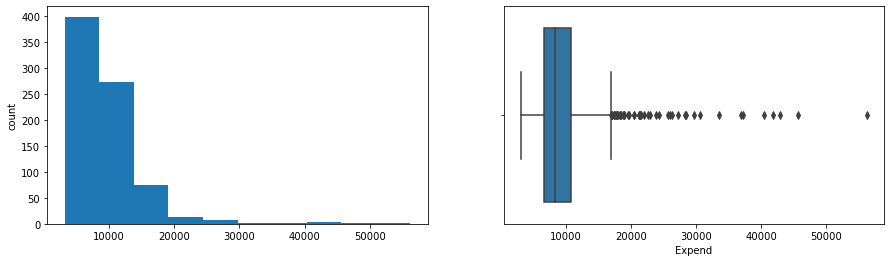

Grad_Rate
Skew : -0.14


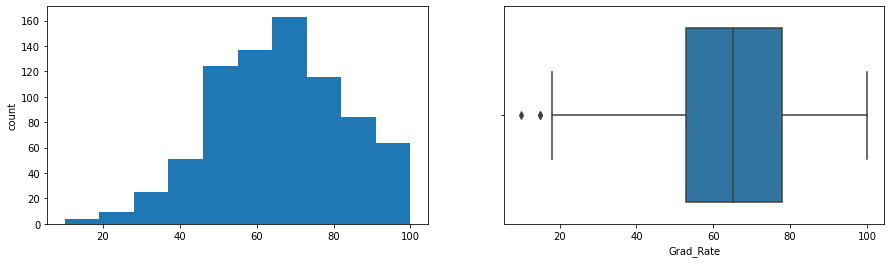

In [10]:
cont_cols = list(data.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- The distribution plots show that Apps, Accept, Enroll, Top10perc, F_Undergrad, P_Undergrad, Books, Personal and Expend variables are highly right skewed. It is evident from boxplots that all these variables have outliers.
- Top25percent is the only variable which does not possess outliers.
- Outstate, Room_Board, S_F_Ratio and perc_alumni seems to have a moderate right skew.
- PhD and Terminal are moderately left skewed. 

**Now, let's check the correlation among different variables.**

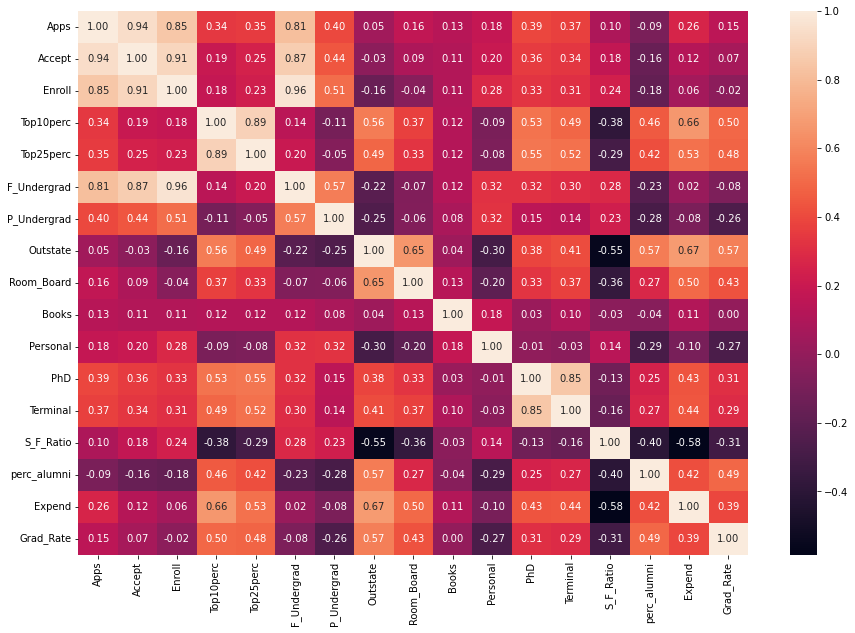

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

**Observations:**

- We can see high positive correlation among following variables: 
    1. Apps and Accept
    2. Apps and Enroll
    3. Apps and F_Undergrad
    4. Accept and Enroll
    5. Accept and F_Undergrad
    6. Enroll and F_Undergrad
    7. Top10perc and Top25percent
    8. PhD and Terminal
- We can see high negative correlation among following variables:
    1. S_F_Ratio and Top10perc
    2. S_F_Ratio and Expend

#### Scaling the data

In [12]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [13]:
data_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375


## Principal Component Analysis

In [14]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

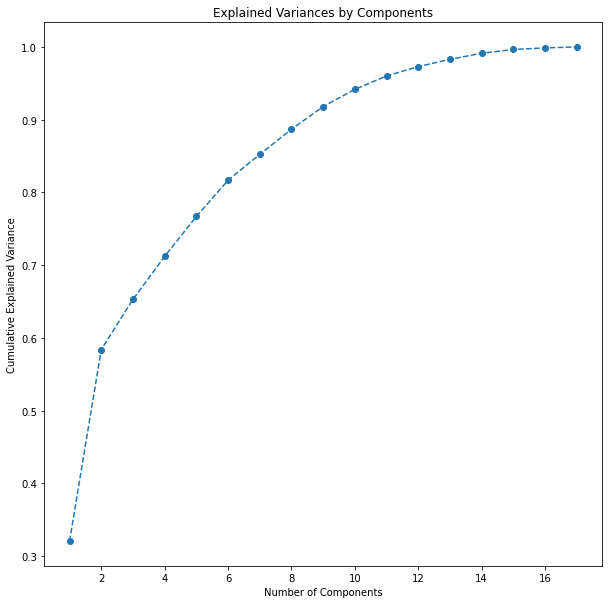

In [15]:
# visualize the Explained Individual Components
plt.figure(figsize = (10,10))
plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [16]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.70):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  4


**Observations**:

-  We can see that out of the 17 original features, we reduced the number of features through principal components to 4, these components explain approximately 70% of the original variance.

- So that is about 76% reduction in the dimensionality with a loss of 30% in variance.

- Let us now look at these principal components as a linear combination of original features.

In [17]:
pca.components_.shape

(17, 17)

In [29]:
pca2 = PCA(n_components=7, random_state=1)
data_pca2 = pd.DataFrame(pca2.fit_transform(data_scaled))


In [30]:
pca2.components_.shape

(7, 17)

In [18]:
pc_comps = ['PC1','PC2','PC3','PC4']
data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4
Apps,0.25,0.33,-0.06,0.28
Accept,0.21,0.37,-0.10,0.27
Enroll,0.18,0.40,-0.08,0.16
Top10perc,0.35,-0.08,0.03,-0.05
Top25perc,0.34,-0.04,-0.02,-0.11
F_Undergrad,0.15,0.42,-0.06,0.10
P_Undergrad,0.03,0.32,0.14,-0.16
Outstate,0.29,-0.25,0.05,0.13
Room_Board,0.25,-0.14,0.15,0.19
Books,0.06,0.06,0.68,0.08


**Observations:**

- Each principal component is a linear combination of original features. For example, we can write the equation for PC1 in the following manner:

0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F_Undergrad + 0.03 * P_Undergrad + 0.29 * Outstate + 0.25 * Room_Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S_F_Ratio + 0.21 * perc_alumni + 0.32 * Expend + 0.25 * Grad_Rate

- For the business implications, the first two principal components picks up around 58% of the variability in the data. That is to say, picking up a considerable amount of variation in the data.

- The explanation of each component along with their weights is also one of the ways to look at it. For example, we can consider weights with absolute value greater than 0.25 significant and analyze the each component.

**NOTE: Decision regarding what value of weights is high or significant may vary from case to case. It depends on the problem at hand.**

In [19]:
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4
Apps,0.250000,0.330000,-0.060000,0.280000
Accept,0.210000,0.370000,-0.100000,0.270000
Enroll,0.180000,0.400000,-0.080000,0.160000
Top10perc,0.350000,-0.080000,0.030000,-0.050000
Top25perc,0.340000,-0.040000,-0.020000,-0.110000
F_Undergrad,0.150000,0.420000,-0.060000,0.100000
P_Undergrad,0.030000,0.320000,0.140000,-0.160000
Outstate,0.290000,-0.250000,0.050000,0.130000
Room_Board,0.250000,-0.140000,0.150000,0.190000
Books,0.060000,0.060000,0.680000,0.080000


**Observations:**

- The first principal component, PC1, is related to high values of students scores (Top10perc, Top25perc), number of out-of-state students (Outstate), faculties education (PhD and Terminal) and the instructional expenditure (Expend) per student. This principal component seams to capture attributes that generally define premier colleges with high quality of students entering them and higher accomplishing faculty that is teaching there. They also seems to take rich students from all over the country. 
- The second principal component, PC2, is related to high values of number of applications - received (Apps), accepted (Accept) and enrolled (Enroll), and number of full time (F_Undergrad) and part time (P_Undergrad) students. This principal component seems to capture attributes that generally define non-premier colleges that are comparatively easier to get admissions into.
- The third principal component, PC3, is related to financial aspects i.e. personal spending (Personal) and cost of books (Books) for a student. It is also associated with low values of student faculty ratios (S_F_Ratio).
- The fourth principal component, PC4, is related to low values of faculty's education and high values of students' graduation rate. This principal component seems to capture attributes that define colleges which lack the highly educated faculty (PhD and Terminal) but it is comparatively easier to graduate from there (Grad_Rate).

#### We can also visualize the data in 2 dimensions using first two principal components 

Text(0, 0.5, 'PC2')

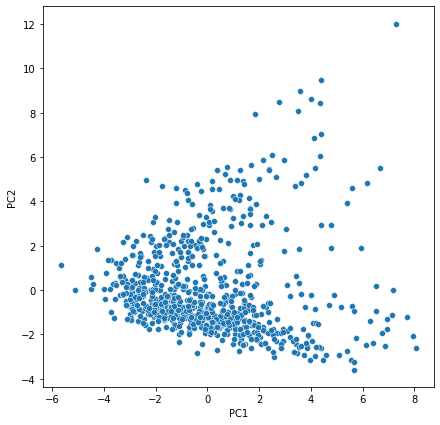

In [20]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")

## t-SNE

Let's try to visualize the data using tSNE by reducing the number of dimensions to 2 and 3. 

**2d visualization**

In [21]:
#Fitting TSNE with number of components equal to 2 
tsne = TSNE(n_components = 2, random_state=1)
data_tsne = tsne.fit_transform(data_scaled)

In [22]:
#Converting the embeddings to a dataframe
data_tsne=pd.DataFrame(data_tsne, columns=['X1', 'X2'])

<AxesSubplot:xlabel='X1', ylabel='X2'>

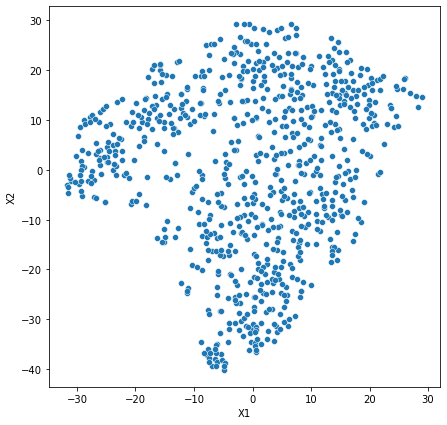

In [23]:
#Scatter plot for two components
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'X1', y='X2', data = data_tsne)

**3d visualization**

In [24]:
#Fitting TSNE with number of components equal to 2 
tsne = TSNE(n_components = 3, random_state=1)
data_tsne = tsne.fit_transform(data_scaled)

In [25]:
data_tsne=pd.DataFrame(data_tsne, columns=['X1', 'X2', 'X3'])

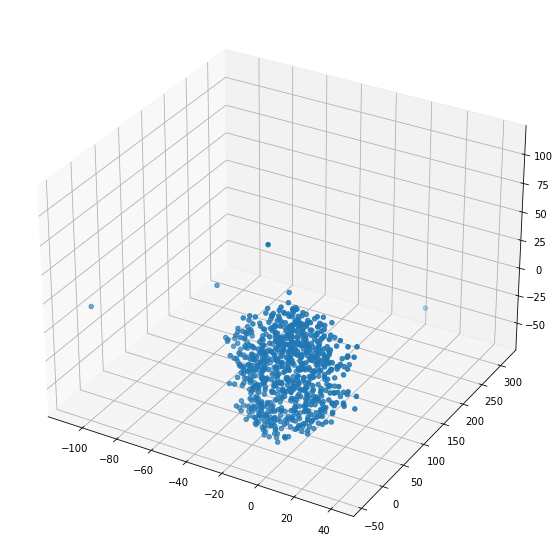

In [26]:
#Scatter plot for all three components
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = data_tsne['X1']
y = data_tsne['X2']
z = data_tsne['X3']

ax.scatter(x, y, z)

**Observations:**

- We know that tsne preserves the local structure of the data while embedding the data from high dimension to low dimension.
- Here, we have generated the 2D and 3D embeddings for the data. We can see that there is pattern in the data and it is scattered and clustered together with exception of some outliers.
- Let's try different perplexity values to visualize the data in 2d.

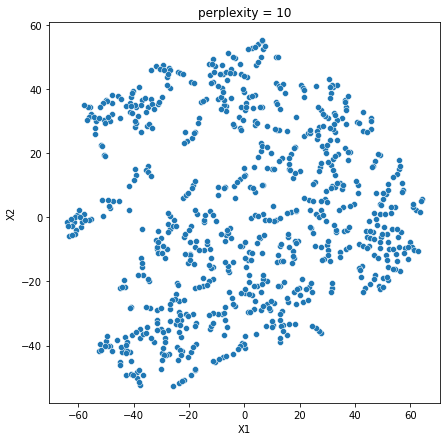

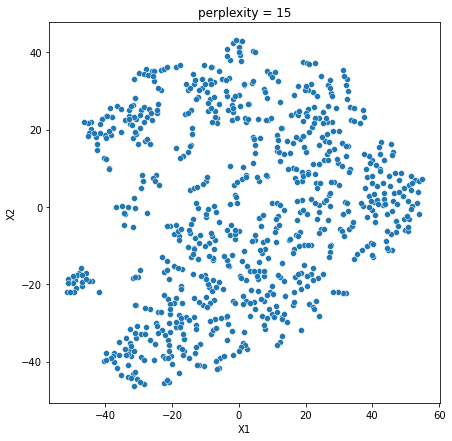

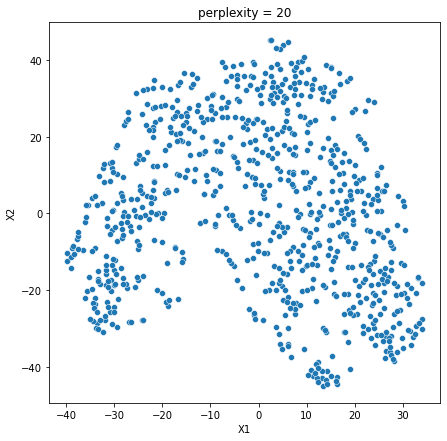

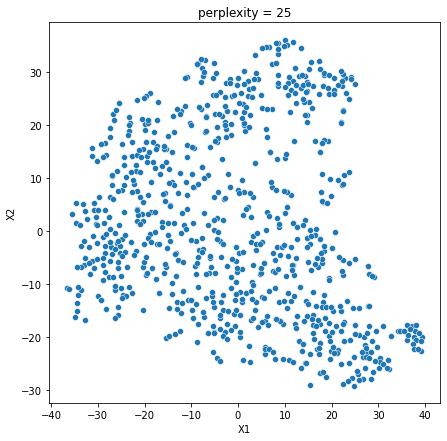

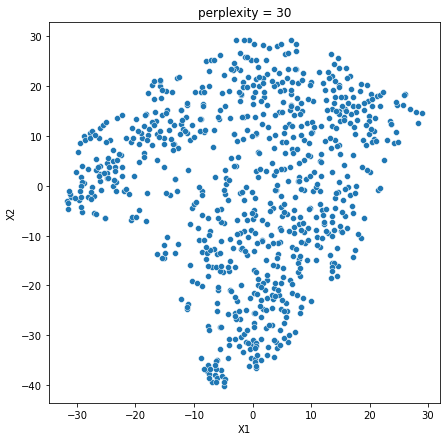

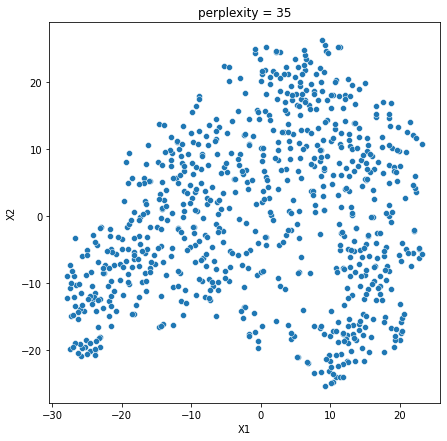

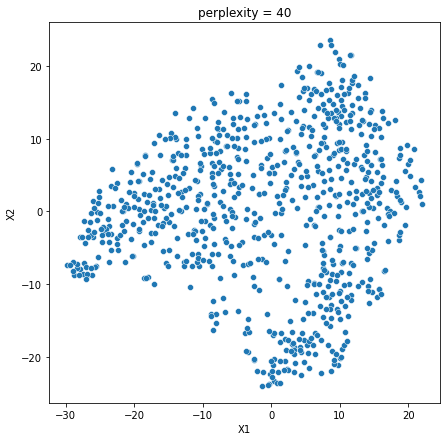

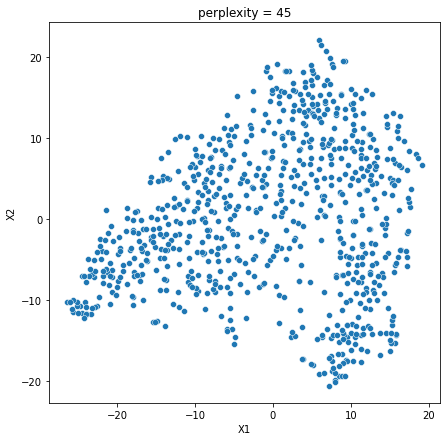

In [27]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state=1, perplexity=i)
    data_tsne = tsne.fit_transform(data_scaled)
    data_tsne = pd.DataFrame(data_tsne)
    data_tsne.columns = ['X1', 'X2']
    plt.figure(figsize = (7,7))
    sns.scatterplot(x = 'X1', y='X2', data = data_tsne)
    plt.title("perplexity = {}".format(i))

**Observations:**

- All the plots with different perplexity values implies that there is no underlying pattern in the data.
- This shows that observing pattern using visualization is dependent on the data. Let's see the implementation of t-sne on another data.

## Air Pollution Data

- Air pollution dataset contains about 13 months of data on major pollutants and meteorological levels of a city.
- Let's get an overview of the data and prepare it for visualization.

In [28]:
#Loading data
data_air_pol = pd.read_csv("Air Pollution Case Study-Dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Air Pollution Case Study-Dataset.csv'

In [ ]:
data_air_pol.head()

#### Check the info of the data

In [ ]:
data_air_pol.info()

**Observations:**

- There are 403 observations and 27 columns in the data.
- All the columns except Date and Weather are of numeric data type.
- The Date and SrNo for all observations would be unique. We can drop these columns as they would not add value to our analysis.
- Weather is of object data type. We can create dummy variables for each category and convert it to numeric data type.
- The majority of the columns have some missing values.
- Let's check the number of missing values in each column.

In [ ]:
data_air_pol.isnull().sum()

**Observation:**

- All the columns except SrNo and Date have missing values.

#### Data Preprocessing

In [ ]:
data_air_pol.drop(columns=["SrNo", "Date"], inplace=True)

In [ ]:
#Imputing missing values with mode for the Weather column and with median for all other columns
for col in data_air_pol.columns:
    if col == "Weather":
        data_air_pol[col].fillna(value=data_air_pol[col].mode()[0], inplace=True)
    else:
        data_air_pol[col].fillna(value=data_air_pol[col].median(), inplace=True)

In [ ]:
#Creating dummy variables for Weather column
data_air_pol = pd.get_dummies(data_air_pol, drop_first=True)

#### Scaling the data

In [ ]:
scaler1 = StandardScaler()
data_air_pol_scaled = scaler.fit_transform(data_air_pol)

In [ ]:
data_air_pol_scaled = pd.DataFrame(data_air_pol_scaled, columns=data_air_pol.columns)

## Principal Component Analysis

In [ ]:
#Defining the number of principal components to generate 
n = data_air_pol_scaled.shape[1]

#Finding principal components for the data
pca1 = PCA(n_components=n, random_state=1)
data_air_pol_pca = pd.DataFrame(pca1.fit_transform(data_air_pol_scaled))

#The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

In [ ]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,29), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [ ]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var1):
  sum = sum + i
  if(sum>0.70):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

In [ ]:
#Making a new dataframe with first 8 principal components and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5],2), index=data_air_pol_scaled.columns, columns=cols)

In [ ]:
def color_high(val):
    if val <= -0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.25:
        return 'background: skyblue'   
    
pc1.style.applymap(color_high)

**Observations:**

- The first principal component, PC1, is related to hydrocarbons like Benzene, Toulene and Xylene which are generated due to fuel combustion.   
- The second principal component, PC2, is related to humidity (RH), Ozone level and rain i.e. monsoon season. Whenever humidity goes down, Ozone level goes up - more sunshine. Higher humidity is an indication of the rain which has potential to wash away atmospheric pollution
- The third principal component, PC3, is capturing pressure in the air - low pressure accompanies windy and rainy conditions, dispersing the pollution away. High pressure stills the wind allowing pollution to build up in urban areas. 
- The fourth principal component, PC4, is associated to high values of toxic gases like SO2 and also related to weather.
- The fifth principal component, PC5,  is explaining direction of wind which impacts air pollution irrespective of concentration of all of pollutants. If the wind is blowing towards an urban area from an industrial area then pollution levels are likely to be higher in the town or city than if the air is blowing from another direction of for example, open farmland.

## t-SNE

Let's try to visualize the data for different perplexity values 

In [ ]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state=1, perplexity=i)
    data_air_pol_tsne = tsne.fit_transform(data_air_pol_scaled)
    data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne)
    data_air_pol_tsne.columns = ['X1', 'X2']
    plt.figure(figsize = (7,7))
    sns.scatterplot(x = 'X1', y='X2', data = data_air_pol_tsne)
    plt.title("perplexity = {}".format(i))

**Observations:**

- We can see that some perplexity values like 35 and 45 are able to capture the underlying pattern in the data better than other perplexity values. 
- This shows that perplexity plays an important role in t-SNE implementation.
- Let's visualize again with perplexity equal to 35 as there are clear 4 cluster which are distant form each other i.e. well separated.  

In [ ]:
#Fitting TSNE with number of components equal to 2 
tsne = TSNE(n_components = 2, random_state=1, perplexity=35)
data_air_pol_tsne = tsne.fit_transform(data_air_pol_scaled)

#Converting the embeddings to a dataframe
data_air_pol_tsne=pd.DataFrame(data_air_pol_tsne, columns=["X1", "X2"])

#Scatter plot for two components
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'X1', y='X2', data = data_air_pol_tsne)

**Observations:**

- We can clearly see 4 clusters in the data.
- We can label these 4 groups.

In [ ]:
# Let's assign points to 4 different groups
def grouping(x):
    first_component = x['X1']
    second_component = x['X2']
    if second_component > 12:
        return 'group_1'
    elif (second_component < -10) and (first_component > -10): 
        return 'group_2'
    elif (second_component < 12) and (first_component > -9):
        return 'group_3'
    else: 
        return 'group_4'

In [ ]:
data_air_pol_tsne['groups'] = data_air_pol_tsne.apply(grouping, axis=1)

In [ ]:
#Scatter plot for two components with hue
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'X1', y='X2', data = data_air_pol_tsne, hue='groups')

**Let's try to visualize properties of these four groups w.r.t all the numeric variables in the data.** 

In [ ]:
all_col = data_air_pol_scaled.columns[:-4].tolist()
plt.figure(figsize=(30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(y=data_air_pol_scaled[variable], x=data_air_pol_tsne['groups'])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**
- There are four groups in the data. Each group has different set of characteristics.

- Group 1 represents **hot and humid areas**. As there is less variability in the pressure, the wind speed is low. Higher humidity is an indication of the rain which has potential to wash away atmospheric pollution which results in low levels of pollutants - fine particulate matter and hydrocarbons.

- Group 2 represents areas with medium humidity and temperature with low pressure and wind speed. The level of pollutants is medium. These might be **developing urban areas** where O3 pollutant is medium to high which results in comparatively higher solar radiations.

- Group 3 is the largest group and represents low humid and high temperature areas. As the variability in pressure is high, the wind speed is high. If the wind is blowing towards an urban area from an industrial area then pollution levels are likely to be higher in the town or city than if the air is blowing from another direction of for example, open farmland. These might be **developed urban areas** as it has the highest level of O3 pollutant and solar radiation which can be a result of pollutants emitted by cars, power plants, etc. 

- Group 4 represents **industrial areas** as it has very high level of hydrocarbons which are generally a result of fuel combustion. These areas have high level of fine particulate matter and other pollutants. As there is less variability in the pressure, the wind speed is low.